# Part 5 - [BlackJack](https://en.wikipedia.org/wiki/Blackjack) Game

Below is a set of steps for you to follow to try to create the Blackjack game!


## 1. Requirements

1. **Game Structure**: Create a simple text-based Blackjack game where one player competes against an automated dealer.
2. **Player Actions**: The player should be able to:
   - Stand or hit
   - Choose their betting amount
3. **Bankroll Management**: Keep track of the player's total money and update it based on wins or losses.
4. **Game Feedback**: Alert the player of wins, losses, busts, etc.
5. **Object-Oriented Programming**: Use classes to define at least:
   - A `Card` class to represent individual cards.
   - A `Deck` class to manage the deck of cards.
   - A `Hand` class to manage the cards held by the player and dealer.
   - A `Player` class to manage player information.

## 2. Game Play Overview

1. Create a deck of 52 cards and shuffle it.
2. Ask the player for their bet, ensuring it does not exceed their available chips.
3. Deal two cards to both the dealer and the player.
4. Show one of the dealer's cards and both of the player's cards.
5. Allow the player to choose to hit or stand.
6. If the player stands, reveal the dealer's hand and play according to the rules (dealer hits until reaching 17).
7. Determine the winner based on hand values and update the player's chips accordingly.
8. Ask if the player wants to play again.

### Playing Cards:
A standard deck of playing cards has four suits (Hearts, Diamonds, Spades and Clubs) and thirteen ranks (2 through 10, then the face cards Jack, Queen, King and Ace) for a total of 52 cards per deck. Jacks, Queens and Kings all have a rank of 10. Aces have a rank of either 11 or 1 as needed to reach 21 without busting. As a starting point in your program, you may want to assign variables to store a list of suits, ranks, and then use a dictionary to map ranks to values.

## 3. Implementation Steps

### Step 1: Define Classes

Consider making a Card class where each Card object has a suit and a rank, then a Deck class to hold all 52 Card objects, which can be shuffled, and finally a Hand class that holds those Cards that have been dealt to each player from the Deck. 

1. **Card Class**:
   - Attributes: `suit`, `rank`
   - Methods: `__str__()` for string representation.
   - Declare variables to store suits & ranks. You might add an attribute for "value"

In [ ]:
"ALMOST NO USE OF AI BARELY DONE BUG FIXES BY CLAUDE AT SOME AREAS"






class Card:
    SUITS = ["Paan", "Chidi", "Hukum", "Eit"]
    RANKS = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
    VALUES = {'A': [1, 11], '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10}
    
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self.VALUES[rank]
        
    def __str__(self):
        return f"{self.suit} ka {self.rank}"



    ' Some bug fix done by AI '
    def __repr__(self):
        return self.__str__()
    




    def build(self):
        cards = []
        for suit in self.SUITS:
            for rank in self.RANKS:
                cards.append(Card(suit, rank))
        return cards





2. **Deck Class**:
   - Attributes: A list of `Card` objects representing a full deck of 52 card objects that can later be shuffled. But first, you need to *instantiate* all 52 unique card objects and add them to our list.
   - Methods:
     - `shuffle()`: Shuffle the deck using `random` library.
     - `deal()`: Remove and return a card from the deck.
   - **OPTIONAL**: We may never need to print the contents of the deck during gameplay, but having the ability to see the cards inside it may help troubleshoot any problems that occur during development. With this in mind, consider adding a \_\_str\_\_ method to the class definition.

In [3]:
class Deck(Card):
    def __init__(self):
        self.cards = self.build()
    
    def shuffle(self):
        import random
        random.shuffle(self.cards)
    
    def deal(self):
        return self.cards.pop()
    
    def __str__(self):
        output = ''
        for card in self.cards:
            output += str(card)
        return output.strip()



TESTING: Just to see that everything works so far, let's see what our Deck looks like!

In [4]:
# You just need to run this cell. 

IngameDeck = Deck()
IngameDeck.shuffle()
for i in range(0,4):
    DealtCard = IngameDeck.deal() 
    print(DealtCard)
print(IngameDeck)




Hukum ka 7
Paan ka 9
Chidi ka Q
Chidi ka 4
Eit ka QHukum ka 3Eit ka KEit ka 5Hukum ka JEit ka 2Eit ka 3Eit ka AHukum ka KPaan ka QHukum ka 10Paan ka AEit ka 10Hukum ka 8Paan ka 6Chidi ka 7Eit ka 8Paan ka 7Chidi ka 5Hukum ka QPaan ka 8Eit ka 9Eit ka JHukum ka 5Hukum ka 9Hukum ka 4Chidi ka 6Eit ka 4Hukum ka AChidi ka KPaan ka 2Eit ka 6Chidi ka 9Paan ka JEit ka 7Chidi ka APaan ka 4Paan ka 3Chidi ka 2Chidi ka 10Chidi ka 3Chidi ka JChidi ka 8Paan ka 5Hukum ka 6Hukum ka 2Paan ka 10Paan ka K


Great! Now let's move on to our Hand class.

In addition to holding Card objects dealt from the Deck, the Hand class may be used to calculate the value of those cards. It may also need to adjust for the value of Aces when appropriate.

3. **Hand Class**:
   - Attributes: A list of cards, total value, number of aces.
   - Methods:
     - `add_card(card)`: Add a card to the hand and update value.
     - `get_value(card)`: Calculate value based on card rank.
     - `adjust_for_ace()`: Adjust value if there are aces and total exceeds 21.

In [5]:

class Hand:
    def __init__(self):
        self.HandCards = []

    def adjust_for_ace(self, total):
        if total + 11 <= 21:
            return total + 11
        else:
            return total + 1

    def get_value(self):
        total = 0
        for card in self.HandCards:
            if card.rank == "A":
                total = self.adjust_for_ace(total)
            else:
                total += card.value
        return total

    def add_card(self, IngameDeck):
        dealt_card = IngameDeck.deal()
        self.HandCards.append(dealt_card)
        return self.get_value()

    def __str__(self):
        output = ''
        for card in self.HandCards:
            output += str(card)
        return output.strip()




    






#!SOME BUG FIXEX BY AI , IT SAYS THAT JUPITER N.B HAS A DIFFERENT ENVIORONMENT THAN VSC THEREFORE GLOBAL WOULD NOT WORK
#?THIS IS WHAT IT SAYS
"The issue youre experiencing in Jupyter Notebook likely stems from how the global keyword interacts with variable scope in Jupyter cells. In Jupyter, running multiple cells can sometimes cause unexpected behavior with global variables. HerEs how to adjust the code to work properly in a Jupyter Notebook environment:"

"Key Changes:"
"Avoid Using global: Instead of using global, it's better to initialize the IngameDeck and PlayerHandCards directly when needed. This is because global variables can behave unexpectedly in interactive environments like Jupyter."
"Initialization in the Function: Modify the hit() function to create and initialize the Deck and Hand classes only if they don’t already exist."

In addition to decks of cards and hands, we need to keep track of a Player's starting chips, bets, and ongoing winnings. This could be done using global variables, but in the spirit of object oriented programming, create a Player class instead!

4. **Player Class**:
   - Attributes: Total chips, current bet.
   - Methods:
     - Methods for winning and losing bets.



In [6]:
# Your code here
class Player():
    def __init__(self,TotalChips=10000 ,CurrentBet=0):
        self.TotalChips = TotalChips
        self.CurrentBet =CurrentBet
    
    def win(self):
        self.TotalChips += self.CurrentBet 
        print(self.TotalChips)
        return self.TotalChips

    def lose(self):
        self.TotalChips -= self.CurrentBet 
        print(self.TotalChips)
        return self.TotalChips

    def bust(self):
        return self.lose() 
    



### Step 2: Game Logic

1. Implement functions for:
   - Taking bets from the player (ensure valid input).
   - Playing a hand (dealing cards, showing hands, handling hits/stands).  
     - Either player can take hits until they bust. This function should account for gameplay anytime a Player requests a hit, or a Dealer's hand is less than 17. It should take in Deck and Hand objects as arguments, and deal one card off the deck and add it to the Hand. You may want it to check for aces in the event that a player's hand exceeds 21.
     You may wanna keep a flag to keep trac of the player's stance (playing or standing) as it will come handy while creating the main game loop.
   - Displaying cards 
     - When the game starts, and after each time Player takes a card, the dealer's first card is hidden and all of Player's cards are visible. At the end of the hand all cards are shown, and you may want to show each hand's total value. Write a function for each of these scenarios.
   - Determining outcomes (win/loss/bust).
     - Write functions to handle end of game scenarios. Remember to pass player's hand, dealer's hand and chips as needed.


In [7]:
class Game:
    def __init__(self):
        self.players = []

    def add_player(self, name):
        player = Player()  
        player.name = name  
        self.players.append(player)
        return player

    def TakingBets(self, player):
        print("Bet?"+  player.name)
        userinput = int(input())
        player.CurrentBet = userinput
        return player.CurrentBet

    def DealerCheck(self, IngameDeck, DealerHandCards):
        hand_value = DealerHandCards.get_value()
        while hand_value < 17:
            hand_value = DealerHandCards.add_card(IngameDeck)
        return DealerHandCards, hand_value






### And now on to the game!!

### Step 3: Main Game Loop

- Create a loop that allows continuous play until the player decides to quit.
- Update player's chips after each round based on results.

In [ ]:
# Game Initialization
CurrentGame = Game()

print("Player 1 name?")
userinput1 = input("Player 1")
input("Player 2 name?")
userinput2 = input("Player 2")
player1 = CurrentGame.add_player(userinput1)
player2 = CurrentGame.add_player(userinput2)



def IteratesubGame():
        for player in CurrentGame.players:
            CurrentGame.TakingBets(player)


        print("Details")
        for player in CurrentGame.players:
            print('Player Name', player.name)
            print('Total Chips', player.TotalChips)
            print('Current Bet', player.CurrentBet)

        Player1HandCards = Hand()
        Player2HandCards = Hand()
        DealerHandCards = Hand()
        IngameDeck = Deck()
        IngameDeck.shuffle()

        Player1HandCards.add_card(IngameDeck)
        Player1HandCards.add_card(IngameDeck)

        Player2HandCards.add_card(IngameDeck)
        Player2HandCards.add_card(IngameDeck)

        DealerHandCards.add_card(IngameDeck)
        DealerHandCards.add_card(IngameDeck)


        print("Player 1")
        print(Player1HandCards)
        print("Current Hand Value", Player1HandCards.get_value())

        print("Player 2")
        print(Player2HandCards)
        print("Current Hand Value", Player2HandCards.get_value())

        print("Dealer")
        print(f"{DealerHandCards.HandCards[0]} + Hidden Card")


        def hit(IngameDeck, hand):
            value = hand.add_card(IngameDeck)
            return hand, value

        ###Boolean does goes false when we want to break the loop
        Boolean1 = True
        while Boolean1:
            print("Player 1's Turn")
            print(Player1HandCards)
            print("Hand Value:", Player1HandCards.get_value())

            userinput = input("Player 1, enter 'yes' to hit or anything else to stand: ")

            if userinput.lower() == "yes":
                hand, hand_value = hit(IngameDeck, Player1HandCards)
                print("Player 1")
                print(hand)
                print("Hand Value:", hand_value)

                if hand_value > 21:
                    print("Bust!")
                    Boolean1 = False
                    break
            else:
                print("Player 1 chose to stand.")
                Boolean1 = False

        Boolean2 = True
        while Boolean2:
            print("Player 2's Turn")
            print(Player2HandCards)
            print("Hand Value:", Player2HandCards.get_value())

            userinput = input("Player 2 enter 'yes' to hit or anything else to stand: ")
            if userinput.lower() == "yes":
                hand, hand_value = hit(IngameDeck, Player2HandCards)
                print("Player 2")
                print(hand)
                print("Hand Value:", hand_value)

                if hand_value > 21:
                    print("Bust!")
                    Boolean2 = False
                    break
            else:
                print("Player 2 stand.")
                Boolean2 = False


        def dealer_turn(deck, hand):
            while hand.get_value() < 17:  
                hand.add_card(deck)
            return hand, hand.get_value()



        DealerHandCards, dealer_hand_value = dealer_turn(IngameDeck, DealerHandCards)
        print("Dealer Hand:")
        print(DealerHandCards)
        print("Dealer Hand Value:", dealer_hand_value)

        player1_hand_value = Player1HandCards.get_value()




        #checking ingame results


        print("Player 1 ")
        if player1_hand_value > 21:
            player1.bust()
            print("Bust!")
        elif dealer_hand_value > 21 or player1_hand_value > dealer_hand_value:
            player1.win()
            print("wins!")
        elif player1_hand_value < dealer_hand_value:
            player1.lose()
            print("lose!")
        else:
            print("tie!")

        player2_hand_value = Player2HandCards.get_value()

        print("Player 2 Outcome:")
        if player2_hand_value > 21:
            player2.bust()
            print("Bust!")
        elif dealer_hand_value > 21 or player2_hand_value > dealer_hand_value:
            player2.win()
            print("wins!")
        elif player2_hand_value < dealer_hand_value:
            player2.lose()
            print("loses!")
        else:
            print("tie")


        print("Player 1 Chips")
        print("Player 2 Chips")

        print(player1.TotalChips)
        print(player2.TotalChips)

        print("Wanna play again? Enter 'yes' to continue.")

        userinput = str(input())


        if userinput.lower() == "yes":
            IteratesubGame()
        else:
            print("Quitted game")




IteratesubGame()



NameError: name 'Game' is not defined

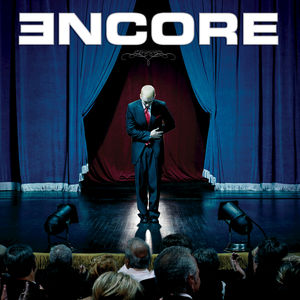

### 5. ƎNCORE!


Great! You've implemented your own version of a Blackjack game in Python. Now, expand upon it by adding features like:

- Double Down option
- Splitting pairs
- Multiple players

**You must add atleast 1 additional feature and create another main game loop to try it out**

Make sure your code is well-commented and follows Python best practices.
Ensure your code is clean, organized, and easy to read.

Remember, the above steps are guidelines and you're free to create your own solution. That's OK! 

Good luck, and have fun coding!

In [12]:
# Your code here
print("Made with multiple players")

Made with multiple players
